# Task 6.5 - Unsupervised Machine Learning: Clustering

This notebook contains-

Importing libraries

Loading dataset

Cleaning the dataset

Using the Elbow Technique

Running the k-means algorithm

Creatig a scatterplot using your clustered data

How and why the clusters make sense?  

Calculating the descriptive statistics for the clusters using the groupby() function

Future Use of Results in an Analytics Pipeline

# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

# Loading Dataset

In [2]:
# Loading cleaned COVID-19 data
path = r'C:\Users\Sanket\Documents\Achievement 6\Data\Prepared data\Cleaned_Conditions_Contributing_to_COVID-19_Deaths_by_State_and_Age_Provisional_2020-2023.csv'
df_covid = pd.read_csv(path)

In [4]:
# Display the first few rows of the dataset
print(df_covid.head())

   Data As Of  Start Date    End Date    Year  Month    State  \
0  2023-09-24  2020-01-01  2020-01-31  2020.0    1.0  Alabama   
1  2023-09-24  2020-02-01  2020-02-29  2020.0    2.0  Alabama   
2  2023-09-24  2020-03-01  2020-03-31  2020.0    3.0  Alabama   
3  2023-09-24  2020-04-01  2020-04-30  2020.0    4.0  Alabama   
4  2023-09-24  2020-05-01  2020-05-31  2020.0    5.0  Alabama   

        Condition Group                Condition ICD10_codes Age Group  \
0  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
1  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
2  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
3  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   
4  Respiratory diseases  Influenza and pneumonia     J09-J18      0-24   

   COVID-19 Deaths  Number of Mentions Flag  
0              0.0                 0.0  NaN  
1              0.0                 0.0  NaN  
2              0.0        

# Cleaning the Dataset

In [5]:
# Drop any non-numerical columns
df_numerical = df_covid.drop(columns=['State', 'Condition Group', 'Condition', 'ICD10_codes', 'Age Group', 'Flag', 'Data As Of', 'Start Date', 'End Date'])

In [6]:
# Check for missing values
print("Missing values before imputation:")
print(df_numerical.isnull().sum())


Missing values before imputation:
Year                       0
Month                      0
COVID-19 Deaths       150829
Number of Mentions    146491
dtype: int64


In [7]:
# Identify rows with missing values
suppressed_rows = df_numerical[df_numerical.isnull().any(axis=1)]

In [8]:
# imputing with mean
# Define a function to generate random integers between 1 and 9
def random_1_to_9(series):
    return series.apply(lambda x: np.random.randint(1, 10) if pd.isnull(x) else x)

# Impute missing values with a random number between 1 and 9
df_numerical.loc[suppressed_rows.index, 'COVID-19 Deaths'] = random_1_to_9(suppressed_rows['COVID-19 Deaths'])
df_numerical.loc[suppressed_rows.index, 'Number of Mentions'] = random_1_to_9(suppressed_rows['Number of Mentions'])

In [9]:
# Verify the changes
print(df_numerical.isnull().sum())

Year                  0
Month                 0
COVID-19 Deaths       0
Number of Mentions    0
dtype: int64


In [10]:
# Manually standardize the data
df_scaled = (df_numerical - df_numerical.mean()) / df_numerical.std()


In [11]:
# Verify standardization
print(df_scaled.head())

       Year     Month  COVID-19 Deaths  Number of Mentions
0 -1.292459 -1.551949        -0.202217           -0.206375
1 -1.292459 -1.253497        -0.202217           -0.206375
2 -1.292459 -0.955045        -0.202217           -0.206375
3 -1.292459 -0.656594        -0.202217           -0.206375
4 -1.292459 -0.358142        -0.202217           -0.206375


#  Using the Elbow Technique

In [12]:
# Elbow method to find the optimal number of clusters
num_cl = range(1, 11)
kmeans_models = [KMeans(n_clusters=i, random_state=42, n_init=10) for i in num_cl]
scores = [kmeans_models[i].fit(df_scaled).score(df_scaled) for i in range(len(kmeans_models))]


In [13]:
# Convert scores to positive values for plotting
scores = [-score for score in scores]

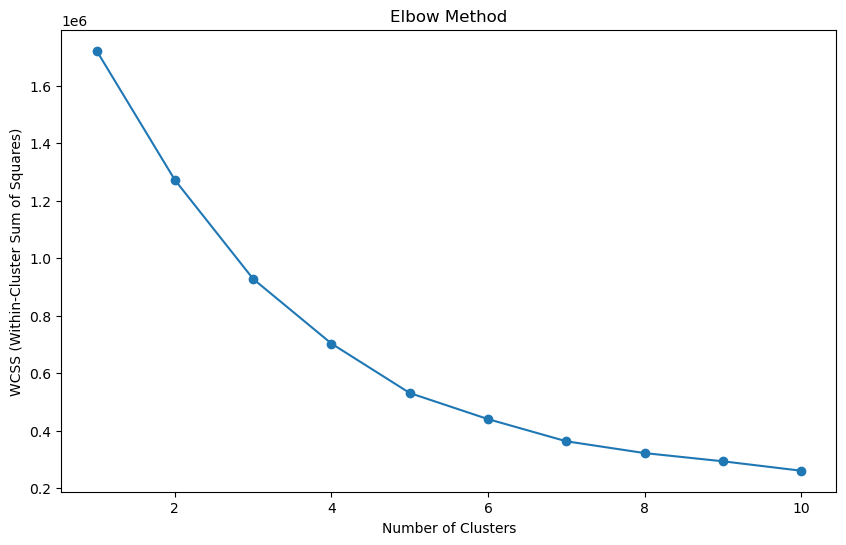

In [14]:
# Plot the elbow graph using pylab
pl.figure(figsize=(10, 6))
pl.plot(num_cl, scores, marker='o')
pl.title('Elbow Method')
pl.xlabel('Number of Clusters')
pl.ylabel('WCSS (Within-Cluster Sum of Squares)')
pl.show()


The elbow graph shows a hyperbola-like curve with decreasing values of Within-Cluster Sum of Squares (WCSS) from 1 to 10 clusters, it suggests that there isn't a clear elbow point where the rate of decrease in WCSS dramatically slows down. This type of curve indicates that it's challenging to determine the optimal number of clusters based solely on the elbow method.

The point at which a slight elbow shape is created is 5; that is, our K value or an optimal number of clusters is 5.

# Running the k-means algorithm

In [15]:
# Run K-means algorithm with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df_scaled['Cluster'] = kmeans.fit_predict(df_scaled)

# Display the first few rows of the dataset with the cluster labels
print(df_scaled.head())


C:\Users\Sanket\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


       Year     Month  COVID-19 Deaths  Number of Mentions  Cluster
0 -1.292459 -1.551949        -0.202217           -0.206375        0
1 -1.292459 -1.253497        -0.202217           -0.206375        0
2 -1.292459 -0.955045        -0.202217           -0.206375        0
3 -1.292459 -0.656594        -0.202217           -0.206375        0
4 -1.292459 -0.358142        -0.202217           -0.206375        0


# Creatig a scatterplot using your clustered data

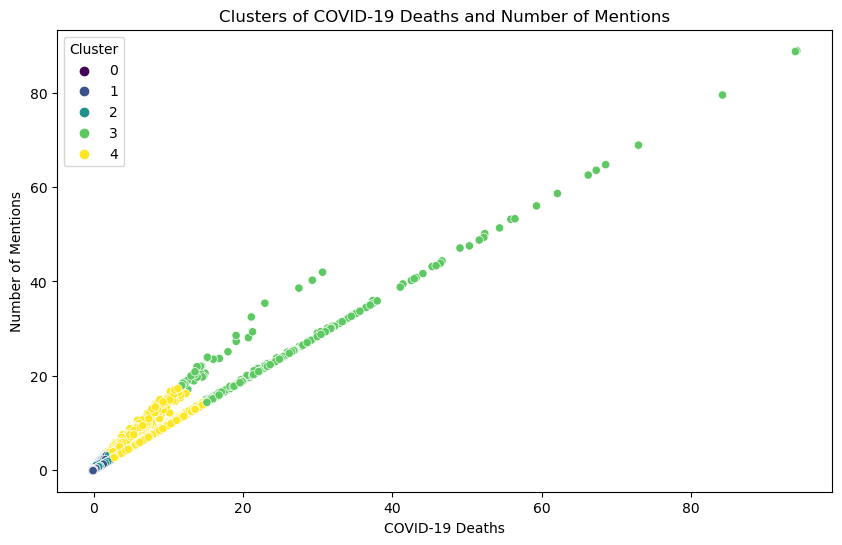

In [16]:
# Scatter plot of the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_scaled['COVID-19 Deaths'], y=df_scaled['Number of Mentions'], hue=df_scaled['Cluster'], palette='viridis')
plt.title('Clusters of COVID-19 Deaths and Number of Mentions')
plt.xlabel('COVID-19 Deaths')
plt.ylabel('Number of Mentions')
plt.legend(title='Cluster')
plt.show()



# How and why the clusters make sense?

If the clusters of COVID-19 Deaths and Number of Mentions are showing increasing plots from 0 to 80, it suggests that there is a correlation between these variables and the assigned clusters. Specifically, it indicates that as the values of COVID-19 Deaths and Number of Mentions increase, the clusters are also increasing in some manner.

# Calculating the descriptive statistics for the clusters using the groupby() function 

In [17]:
# Attach the cluster labels to the original dataframe
df_covid['Cluster'] = kmeans.labels_

# Calculate descriptive statistics for each cluster
cluster_stats = df_covid.groupby('Cluster').describe()

# Display the descriptive statistics for each cluster
print(cluster_stats)


             Year                                                         \
            count         mean       std     min     25%     50%     75%   
Cluster                                                                    
0        122680.0  2020.459749  0.498379  2020.0  2020.0  2020.0  2021.0   
1        152176.0  2022.565503  0.495692  2022.0  2022.0  2023.0  2023.0   
2        150744.0  2021.006660  0.791630  2020.0  2020.0  2021.0  2022.0   
3           324.0  2020.685185  0.676654  2020.0  2020.0  2021.0  2021.0   
4          4636.0  2020.863676  0.765751  2020.0  2020.0  2021.0  2021.0   

                    Month            ... COVID-19 Deaths          \
            max     count      mean  ...             75%     max   
Cluster                              ...                           
0        2021.0  122680.0  3.778375  ...             0.0   156.0   
1        2023.0  152176.0  4.579546  ...             0.0   165.0   
2        2022.0  150744.0  9.805458  ...           

Cluster 0 appears to represent a consistent level of COVID-19 deaths and mentions over the years 2020-2022. The variability is moderate.

Cluster 1 contains data from the most recent years (2022-2023) with lower mean deaths and mentions, suggesting a decline in deaths and media attention over time.

Cluster 2 shows higher variability in deaths and mentions, possibly indicating regions or times with significant outbreaks and media coverage.

Cluster 3 indicates lower deaths and mentions, possibly representing areas with effective control measures or less severe outbreaks.

Cluster 4 contains extreme values, with very high deaths and mentions, representing significant outliers or areas with severe outbreaks and high media coverage.

Conclusion:

The clustering reveals distinct patterns in the COVID-19 data. Clusters with higher deaths and mentions likely correspond to significant outbreaks and increased media attention. Over time, as seen in Cluster 1, the number of deaths and mentions decreased, indicating improved control measures or reduced severity of the virus. The extreme values in Cluster 4 highlight areas or periods with severe impacts, requiring further investigation to understand the underlying causes. This clustering provides insights into how the pandemic evolved and its impact on different regions and times.

# Future Use of Results in an Analytics Pipeline

- Clusters with high deaths and mentions (e.g., Cluster 4) can be prioritized for public health interventions and resource allocation.

- Understanding the trends over time (e.g., Cluster 1 showing reduced deaths and mentions) helps in evaluating the effectiveness of control measures and can guide future policies.

- Clusters indicating significant variability and high values (e.g., Cluster 2) can be monitored for early detection of new outbreaks and timely response.

- Identifying clusters with consistent patterns (e.g., Cluster 0) can assist in planning healthcare resources and media strategies.

- Integrating cluster information with geographic data to identify regional hotspots and direct efforts to high-risk areas.

- Clusters can be used as features in predictive models to forecast future outbreaks or the impact of interventions.


In [27]:
#save the elbow plot

In [26]:
plt.savefig(r'C:\Users\Sanket\Documents\Achievement 6\Analysis\Visualisations\elbow_graph.png')

<Figure size 640x480 with 0 Axes>

In [28]:
# Save the scatterplot to the specified folder
plt.savefig(r'C:\Users\Sanket\Documents\Achievement 6\Analysis\Visualisations\Clusters of COVID-19 Deaths and Number of Mentions.png')


<Figure size 640x480 with 0 Axes>